## Final Project Submission

Please fill out:
* Student name: Moses Lin, Jean-Paul Ventura
* Student pace: Full time
* Scheduled project review date/time: 5/29/20 at 1:30pm EST to 3:00pm EST
* Instructor name: Fangfang
* Blog post URL: N/A


In [8]:
#importing necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#importing file from zippedData and converting to dataframe
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_df.head(-1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [10]:
#removing movies without recorded gross
tn_df = tn_df[tn_df.domestic_gross != '$0']
tn_df.head(-1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"


In [11]:
#Cleaning up data for easier use
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '')
tn_df['production_budget'] = tn_df['production_budget'].astype(int)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].astype(int)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].astype(int)
tn_df.head(-1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5774,75,"Oct 8, 2004",Primer,7000,424760,841926
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495


In [12]:
#Calculating domestic and worldwide profit
tn_df['domestic_profit'] = tn_df['domestic_gross'] - tn_df['production_budget']
tn_df['worldwide_profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']
tn_df.head(-1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747
...,...,...,...,...,...,...,...,...
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,417760,834926
5775,76,"May 26, 2006",Cavite,7000,70071,71644,63071,64644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,-6100
5778,79,"Apr 2, 1999",Following,6000,48482,240495,42482,234495


# Is domestic success an indicator of global success?

We want to check if there is a correlation between domestic success and global success by plotting both onto a scatterplot with a line of best fit. If there is a positive correlation, then it would be profitable to accomodate movies for both domestic and overseas distribution.

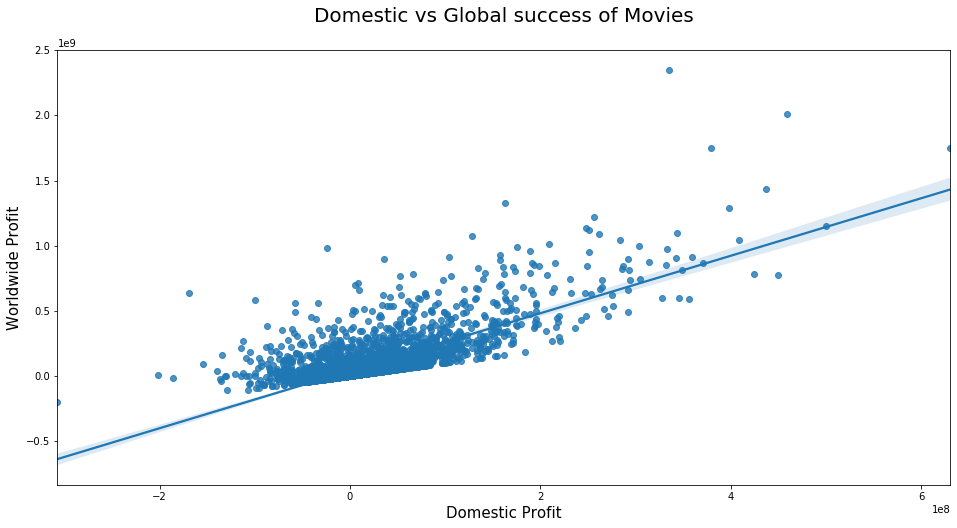

In [13]:
#using seaborn instead of matplotlib because automatically comes with line of best fit
#visualization of correlation between domestic and global success of movies
u = list(tn_df['domestic_profit'])
y = list(tn_df['worldwide_profit'])
fig, ax = plt.subplots(figsize=(16,8))
sns.regplot(u,y)
ax.set_xlabel('Domestic Profit', fontsize=(15))
ax.set_ylabel('Worldwide Profit', fontsize=(15))
ax.set_title('Domestic vs Global success of Movies', fontsize=(20), y = 1.05)
plt.savefig('Domestic vs Global success of Movies.png', dpi=600, bbox_inches='tight')

In [14]:
#cleaning up data to only work with year of release
tn_df['release_date'] = tn_df['release_date'].astype(str)
tn_df['release_date'] = tn_df['release_date'].apply(lambda x: x[-4:])
tn_df['release_date'] = tn_df['release_date'].astype(int)
tn_df.sort_values(by=['domestic_profit'], ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
41,42,2018,Black Panther,200000000,700059566,1348258224,500059566,1148258224
42,43,1997,Titanic,200000000,659363944,2208208395,459363944,2008208395
3464,65,1977,Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,449998007,775598007
33,34,2015,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
...,...,...,...,...,...,...,...,...
31,32,2012,Battleship,220000000,65233400,313477717,-154766600,93477717
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
12,13,2013,The Lone Ranger,275000000,89302115,260002115,-185697885,-14997885
13,14,2012,John Carter,275000000,73058679,282778100,-201941321,7778100


In [15]:
#making dataframe for movies released within 10 years
tn_df_recent10 = tn_df[tn_df['release_date'] >= 2010]
tn_df_recent10.sort_values(by=['domestic_profit'], ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
41,42,2018,Black Panther,200000000,700059566,1348258224,500059566,1148258224
33,34,2015,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
43,44,2018,Incredibles 2,200000000,608581744,1242520711,408581744,1042520711
26,27,2012,The Avengers,225000000,623279547,1517935897,398279547,1292935897
...,...,...,...,...,...,...,...,...
31,32,2012,Battleship,220000000,65233400,313477717,-154766600,93477717
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
12,13,2013,The Lone Ranger,275000000,89302115,260002115,-185697885,-14997885
13,14,2012,John Carter,275000000,73058679,282778100,-201941321,7778100


In [16]:
#making dataframe for movies released within 20 years
tn_df_recent20 = tn_df[tn_df['release_date'] >= 2000]
tn_df_recent20.sort_values(by=['domestic_profit'], ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
41,42,2018,Black Panther,200000000,700059566,1348258224,500059566,1148258224
33,34,2015,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
43,44,2018,Incredibles 2,200000000,608581744,1242520711,408581744,1042520711
26,27,2012,The Avengers,225000000,623279547,1517935897,398279547,1292935897
...,...,...,...,...,...,...,...,...
31,32,2012,Battleship,220000000,65233400,313477717,-154766600,93477717
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
12,13,2013,The Lone Ranger,275000000,89302115,260002115,-185697885,-14997885
13,14,2012,John Carter,275000000,73058679,282778100,-201941321,7778100


In [17]:
#calculating mean domestic/worldwide profit for all movies, movies in past 10 years, movies in past 20 years.
print(tn_df['domestic_profit'].mean())
print(tn_df['worldwide_profit'].mean())

print(tn_df_recent10['domestic_profit'].mean())
print(tn_df_recent10['worldwide_profit'].mean())

print(tn_df_recent20['domestic_profit'].mean())
print(tn_df_recent20['worldwide_profit'].mean())

12223985.740542606
66728026.10546427
11283908.419697817
93865934.41578063
9453451.599223804
71583788.23803364


In [18]:
#creating list for worldwide profit per year for the last 10 years.
last10 = [tn_df.loc[tn_df['release_date'] == 2010]['worldwide_profit'].mean(),
          tn_df.loc[tn_df['release_date'] == 2011]['worldwide_profit'].mean(),
          tn_df.loc[tn_df['release_date'] == 2012]['worldwide_profit'].mean(),
          tn_df.loc[tn_df['release_date'] == 2013]['worldwide_profit'].mean(),
          tn_df.loc[tn_df['release_date'] == 2014]['worldwide_profit'].mean(),
          tn_df.loc[tn_df['release_date'] == 2015]['worldwide_profit'].mean(),
          tn_df.loc[tn_df['release_date'] == 2016]['worldwide_profit'].mean(),
          tn_df.loc[tn_df['release_date'] == 2017]['worldwide_profit'].mean(),
          tn_df.loc[tn_df['release_date'] == 2018]['worldwide_profit'].mean(),
          tn_df.loc[tn_df['release_date'] == 2019]['worldwide_profit'].mean()]
print(last10)

#creating list for worldwide profit per year for the last 20 years.
last20 = [tn_df.loc[tn_df['release_date'] == 2000]['worldwide_profit'].mean(),
                  tn_df.loc[tn_df['release_date'] == 2001]['worldwide_profit'].mean(),
                  tn_df.loc[tn_df['release_date'] == 2002]['worldwide_profit'].mean(),
                  tn_df.loc[tn_df['release_date'] == 2003]['worldwide_profit'].mean(),
                  tn_df.loc[tn_df['release_date'] == 2004]['worldwide_profit'].mean(),
                  tn_df.loc[tn_df['release_date'] == 2005]['worldwide_profit'].mean(),
                  tn_df.loc[tn_df['release_date'] == 2006]['worldwide_profit'].mean(),
                  tn_df.loc[tn_df['release_date'] == 2007]['worldwide_profit'].mean(),
                  tn_df.loc[tn_df['release_date'] == 2008]['worldwide_profit'].mean(),
                  tn_df.loc[tn_df['release_date'] == 2009]['worldwide_profit'].mean()] + last10
print(last20)

[60965918.13414634, 69501868.33480176, 94030953.92, 91066161.75647669, 92950177.2408377, 93294659.61057693, 104148144.734375, 135157501.2147651, 141196613.4379562, 89643278.68181819]
[37742696.61375661, 49608344.41242938, 47238438.937799044, 51540440.18461538, 55875917.38, 47355376.78504673, 45046110.008097164, 57934487.02955665, 55619726.82426778, 76127861.88292684, 60965918.13414634, 69501868.33480176, 94030953.92, 91066161.75647669, 92950177.2408377, 93294659.61057693, 104148144.734375, 135157501.2147651, 141196613.4379562, 89643278.68181819]


# Is right now even a good time to enter the market?

Now that we have most of our data cleaned, we can manipulate values for each year to make predictions for later years based on previous years.

We can check the trend of profit every year to see how much is made for that year. We can add the mean profit of every year into a list and visualize the trend of profitability of movies over time. If it's generally increasing, it could be considered a good time to enter the market.

Text(0.5, 1.0, 'Mean Worldwide Profit for Movies over the last 20 years')

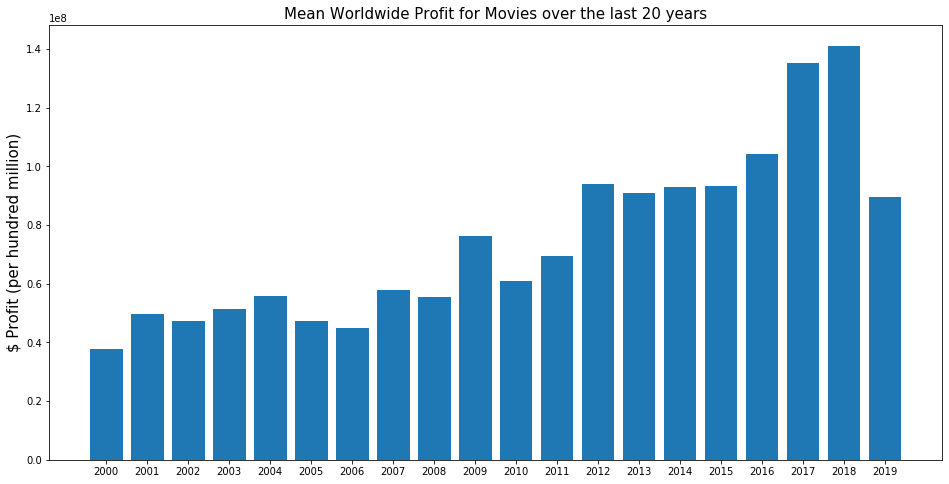

In [203]:
#Visualization of trend of profit made over last 20 years
m = [*range(2000, 2020, 1)]
n = last20
plt.figure(figsize=(16,8))
plt.bar(m, n)
plt.xticks(m)
plt.ylabel('$ Profit (per hundred million)', fontsize=(15))
plt.title('Mean Worldwide Profit for Movies over the last 20 years', fontsize =(15))

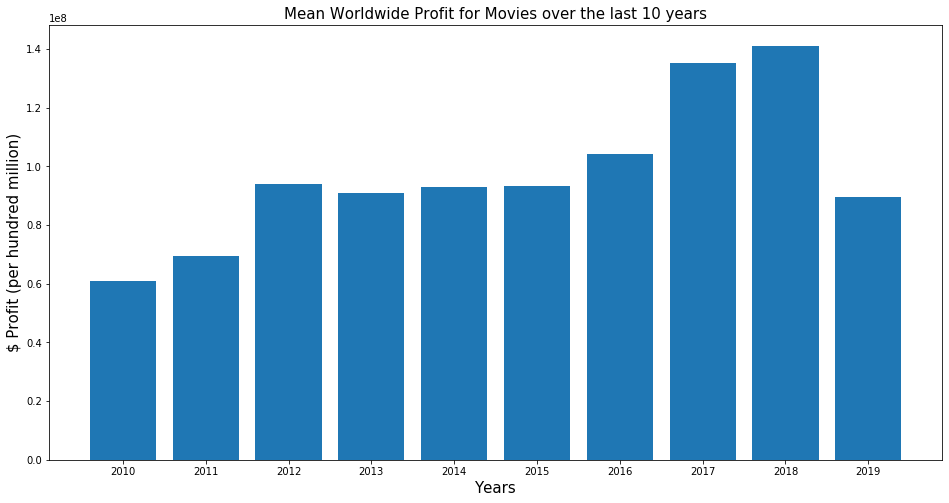

In [19]:
#Visualization of trend of profit made over last 10 years
#last 10 years for consistency with later visualization
m = [*range(2010, 2020, 1)]
n = last10
plt.figure(figsize=(16,8))
plt.bar(m, n)
plt.xticks(m)
plt.xlabel('Years', fontsize=(15))
plt.ylabel('$ Profit (per hundred million)', fontsize=(15))
plt.title('Mean Worldwide Profit for Movies over the last 10 years', fontsize =(15))
plt.savefig('Mean Worldwide Profit for Movies over the last 10 years.png', dpi=600, bbox_inches='tight')

In [21]:
#checking number of movies within the last 10 years
movie_names = tn_df_recent10['movie'].tolist()
len(movie_names)

1787

In [22]:
#grabbing genres for movies within the last 10 years using API. 
import json
import time
import requests

def get_keys(path):
    with open(path) as f:
        data = json.load(f)
        return data

keys = get_keys("/Users/moseslin/.secret/tmdb.json")

api_key = keys['api_key']

response_list = []
for id in movie_names:
    data = requests.get("https://api.themoviedb.org/3/search/movie?api_key=" + api_key + "&query=" + id)
    
    try:
        data = json.loads(data.content)['results'][0]['genre_ids']
    except IndexError:
        pass
    response_list.append(data)
    
response_list

[[28, 12, 14],
 [28, 12, 878],
 [28, 12, 878],
 <Response [200]>,
 <Response [200]>,
 [28, 12, 878],
 [28, 12, 14, 878],
 [28, 12, 53],
 [28, 80, 18, 53],
 [12, 878],
 [28, 12, 37],
 [28, 12, 878],
 [16, 10751],
 [28, 12, 878],
 [28, 12, 14],
 [28, 12, 14],
 [28, 12, 14],
 [28, 12, 14],
 [28, 80, 53],
 [28, 12, 35, 14],
 [28, 12, 878],
 [28, 12, 14, 878],
 [28, 12, 14],
 [28, 12, 878, 53],
 [28, 12, 878, 53],
 [28, 12, 878, 53],
 [28, 35, 878],
 [28, 12, 878],
 [28, 12, 53],
 [28, 12, 14, 878],
 [28, 12, 16, 10751],
 [28, 12, 878],
 [12, 16, 35, 10751],
 [16, 35, 10751],
 [28, 12, 878],
 [28, 12, 35, 878],
 [12, 14, 10751],
 [28, 12, 53],
 [16, 10751],
 [12, 14, 10751],
 [28, 12, 14, 878],
 [28, 12, 14],
 [12, 16, 35, 10751],
 [12, 28, 878],
 [12, 14, 10751],
 [12, 28, 53, 878],
 [28, 12, 14, 10749],
 [28, 878, 12],
 [28, 12, 14],
 [28, 12, 10751, 14],
 [28, 53],
 [28, 12, 878],
 [28, 18, 27, 878, 53],
 [18, 10749],
 [28, 12, 878],
 [12, 16, 10751],
 [28, 12, 16, 35, 14, 10751],
 [28, 

In [23]:
#checking to see if genres were obtained for all titles within 10 years
len(response_list)

1787

In [24]:
#changing <Response [200]> into string so it can be more easily removed later
#used type() to determine that it was not a list
new_response_list = ["NULL" if type(x) != list else x for x in response_list]
new_response_list

[[28, 12, 14],
 [28, 12, 878],
 [28, 12, 878],
 'NULL',
 'NULL',
 [28, 12, 878],
 [28, 12, 14, 878],
 [28, 12, 53],
 [28, 80, 18, 53],
 [12, 878],
 [28, 12, 37],
 [28, 12, 878],
 [16, 10751],
 [28, 12, 878],
 [28, 12, 14],
 [28, 12, 14],
 [28, 12, 14],
 [28, 12, 14],
 [28, 80, 53],
 [28, 12, 35, 14],
 [28, 12, 878],
 [28, 12, 14, 878],
 [28, 12, 14],
 [28, 12, 878, 53],
 [28, 12, 878, 53],
 [28, 12, 878, 53],
 [28, 35, 878],
 [28, 12, 878],
 [28, 12, 53],
 [28, 12, 14, 878],
 [28, 12, 16, 10751],
 [28, 12, 878],
 [12, 16, 35, 10751],
 [16, 35, 10751],
 [28, 12, 878],
 [28, 12, 35, 878],
 [12, 14, 10751],
 [28, 12, 53],
 [16, 10751],
 [12, 14, 10751],
 [28, 12, 14, 878],
 [28, 12, 14],
 [12, 16, 35, 10751],
 [12, 28, 878],
 [12, 14, 10751],
 [12, 28, 53, 878],
 [28, 12, 14, 10749],
 [28, 878, 12],
 [28, 12, 14],
 [28, 12, 10751, 14],
 [28, 53],
 [28, 12, 878],
 [28, 18, 27, 878, 53],
 [18, 10749],
 [28, 12, 878],
 [12, 16, 10751],
 [28, 12, 16, 35, 14, 10751],
 [28, 12, 14],
 [28, 12, 8

In [25]:
#concatenating items in lists to strings for easier handling later.
newer_response_list = []
for x in new_response_list:
    newer_response_list.append(','.join(map(str, x)))
newer_response_list

['28,12,14',
 '28,12,878',
 '28,12,878',
 'N,U,L,L',
 'N,U,L,L',
 '28,12,878',
 '28,12,14,878',
 '28,12,53',
 '28,80,18,53',
 '12,878',
 '28,12,37',
 '28,12,878',
 '16,10751',
 '28,12,878',
 '28,12,14',
 '28,12,14',
 '28,12,14',
 '28,12,14',
 '28,80,53',
 '28,12,35,14',
 '28,12,878',
 '28,12,14,878',
 '28,12,14',
 '28,12,878,53',
 '28,12,878,53',
 '28,12,878,53',
 '28,35,878',
 '28,12,878',
 '28,12,53',
 '28,12,14,878',
 '28,12,16,10751',
 '28,12,878',
 '12,16,35,10751',
 '16,35,10751',
 '28,12,878',
 '28,12,35,878',
 '12,14,10751',
 '28,12,53',
 '16,10751',
 '12,14,10751',
 '28,12,14,878',
 '28,12,14',
 '12,16,35,10751',
 '12,28,878',
 '12,14,10751',
 '12,28,53,878',
 '28,12,14,10749',
 '28,878,12',
 '28,12,14',
 '28,12,10751,14',
 '28,53',
 '28,12,878',
 '28,18,27,878,53',
 '18,10749',
 '28,12,878',
 '12,16,10751',
 '28,12,16,35,14,10751',
 '28,12,14',
 '28,12,878',
 '18,878',
 '12,35,14,10749,10751',
 '28,12,35,14',
 '28,12,14,10749,10751',
 '12,10751,14',
 '28,12',
 '12,18,10751',


In [26]:
#Adding genre to each movie within the last 10 years
#make new clean dataframe without nulls
#seems like 54 titles were lost upon trimming
tn_df_recent10['genre'] = newer_response_list
tn_df_clean10 = tn_df_recent10[tn_df_recent10['genre'] != 'N,U,L,L' ]
tn_df_clean10

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,genre
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,"28,12,14"
2,3,2019,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,"28,12,878"
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,"28,12,878"
6,7,2018,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,"28,12,878"
8,9,2017,Justice League,300000000,229024295,655945209,-70975705,355945209,"28,12,14,878"
...,...,...,...,...,...,...,...,...,...
5737,38,2016,Krisha,30000,144822,144822,114822,114822,18
5740,41,2010,Down Terrace,30000,9812,9812,-20188,-20188,"18,28,35"
5744,45,2017,Emily,27000,3547,3547,-23453,-23453,"80,18,27,53"
5760,61,2010,Breaking Upwards,15000,115592,115592,100592,100592,"35,10749"


In [27]:
#finding out what each genre id stands for
genres = requests.get("https://api.themoviedb.org/3/genre/movie/list?api_key=" + api_key + "&language=en-US")
list(genres)
#28 = 'Action'
#12 = 'Adventure'
#16 = 'Animation'
#35 = 'Comedy'
#80 = 'Crime'
#99 = 'Documentary'
#18 = 'Drama'
#10751 = 'Family'
#14 = 'Fantasy'
#36 = 'History'
#27 = 'Horror'
#10402 = 'Music'
#9648 = 'Mystery'
#10749 = 'Romance'
#878 = 'Science Fiction'
#10770 = 'TV Movie'
#53 = 'Thriller'
#10752 = 'War'
#37 = 'Western'

[b'{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":8',
 b'0,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"',
 b'},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"nam',
 b'e":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":',
 b'"War"},{"id":37,"name":"Western"}]}']

In [28]:
#Credit to gabbyflabby for this code.
#split will turn the genre id strings from earlier into singular genre ids, remove spaces in between them,
#and add them to the empty list at the start. This list will have many repeating genre ids.
#the list is then looped through and the number of times the genre id shows up will be stored in a dictionary
genre_list = []
for genres in tn_df_clean10['genre']:
    genre_list.extend(genre.strip() for genre in genres.split(','))
    genre_dict = {}
    for genre in genre_list:
        if genre in genre_dict:
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1
            
genre_dict

{'28': 457,
 '12': 332,
 '14': 189,
 '878': 218,
 '53': 451,
 '80': 228,
 '18': 820,
 '37': 25,
 '16': 120,
 '10751': 195,
 '35': 589,
 '10749': 241,
 '27': 191,
 '9648': 118,
 '10752': 49,
 '10402': 56,
 '36': 79,
 '99': 43,
 '': 3,
 '10770': 2}

In [29]:
#creating a copy due to issue encountered later due to not converting genre ids in earlier dataframe into text name
genre_dict_copy = genre_dict.copy()
genre_dict_copy

{'28': 457,
 '12': 332,
 '14': 189,
 '878': 218,
 '53': 451,
 '80': 228,
 '18': 820,
 '37': 25,
 '16': 120,
 '10751': 195,
 '35': 589,
 '10749': 241,
 '27': 191,
 '9648': 118,
 '10752': 49,
 '10402': 56,
 '36': 79,
 '99': 43,
 '': 3,
 '10770': 2}

In [30]:
#converting genre ids into actual genre names
genre_dict['Action'] = genre_dict.pop('28')
genre_dict['Adventure'] = genre_dict.pop('12')
genre_dict['Fantasy'] = genre_dict.pop('14')
genre_dict['Science Fiction'] = genre_dict.pop('878')
genre_dict['Thriller'] = genre_dict.pop('53')
genre_dict['Crime'] = genre_dict.pop('80')
genre_dict['Drama'] = genre_dict.pop('18')
genre_dict['Western'] = genre_dict.pop('37')
genre_dict['Animation'] = genre_dict.pop('16')
genre_dict['Family'] = genre_dict.pop('10751')
genre_dict['Comedy'] = genre_dict.pop('35')
genre_dict['Romance'] = genre_dict.pop('10749')
genre_dict['Horror'] = genre_dict.pop('27')
genre_dict['Mystery'] = genre_dict.pop('9648')
genre_dict['War'] = genre_dict.pop('10752')
genre_dict['Music'] = genre_dict.pop('10402')
genre_dict['History'] = genre_dict.pop('36')
genre_dict['Documentary'] = genre_dict.pop('99')
genre_dict['Other'] = genre_dict.pop('')
genre_dict['TV Movie'] = genre_dict.pop('10770')

In [31]:
#checking if it worked
genre_dict

{'Action': 457,
 'Adventure': 332,
 'Fantasy': 189,
 'Science Fiction': 218,
 'Thriller': 451,
 'Crime': 228,
 'Drama': 820,
 'Western': 25,
 'Animation': 120,
 'Family': 195,
 'Comedy': 589,
 'Romance': 241,
 'Horror': 191,
 'Mystery': 118,
 'War': 49,
 'Music': 56,
 'History': 79,
 'Documentary': 43,
 'Other': 3,
 'TV Movie': 2}

In [32]:
#converting dictionary into a dataframe. list is needed to avoid indexing issue
genreprofit_dict = {'genre': list(genre_dict.keys()), 'count': list(genre_dict.values())}
genreprofit_df = pd.DataFrame(genreprofit_dict)
genreprofit_df

,genre,count
0,Action,457
1,Adventure,332
2,Fantasy,189
3,Science Fiction,218
4,Thriller,451
5,Crime,228
6,Drama,820
7,Western,25
8,Animation,120
9,Family,195


In [33]:
#Credit to gabbyflabby for code. using copy from earlier due to needing to loop through a dataframe with
#unconverted genre ids. itterows is used to itterate through rows of dataframe for movies in last 10 years.
#The value for worldwide profit of a certain genre is stored and summed in the fresh dictionary created at the start.
#if statement to add value to existing genre in dict, else statement is for entering new genre entry.
#the profit average column is added by taking list of sum and dividing each sum by respective counts.

unique_genres = list(genre_dict_copy.keys())

genre_profit_dict = {}
for index, row in tn_df_recent10.iterrows():
    for genre in unique_genres:
        if genre in row['genre']:
            profit = row['worldwide_profit']
            if genre in genre_profit_dict:
                genre_profit_dict[genre] += profit
            else:
                genre_profit_dict[genre] = profit
                
genreprofit_df['profit_average'] = list(genre_profit_dict.values())/genreprofit_df['count']
genreprofit_df

,genre,count,profit_average
0,Action,457,1.704054e+08
1,Adventure,332,2.473225e+08
2,Fantasy,189,1.991115e+08
3,Science Fiction,218,7.694423e+08
4,Thriller,451,9.395402e+07
5,Crime,228,1.453891e+08
6,Drama,820,1.545816e+07
7,Western,25,1.517305e+09
8,Animation,120,1.023637e+07
9,Family,195,1.506130e+08


In [34]:
#sort the chart by descending profits so bar graph will be in the same order.
#Western for some reason has abnormally high values. So does Science Fiction also a little iffy
genreprofitsortdf = genreprofit_df.sort_values(by=['profit_average'], ascending=False)
genreprofitsortdfW = genreprofitsortdf.iloc[1:]
genreprofitsortdfW

,genre,count,profit_average
3,Science Fiction,218,7.694423e+08
1,Adventure,332,2.473225e+08
11,Romance,241,2.170573e+08
2,Fantasy,189,1.991115e+08
18,Other,3,1.841859e+08
0,Action,457,1.704054e+08
9,Family,195,1.506130e+08
14,War,49,1.491192e+08
5,Crime,228,1.453891e+08
13,Mystery,118,9.788495e+07


# What are some safer genre choices to ensure profit?

The initial dataframes that were created were based on infomation per movie. However, if we want to get more information on what genres are the "safest" to produce for profit, then we will need to use a new dataframe to sum information per genre.

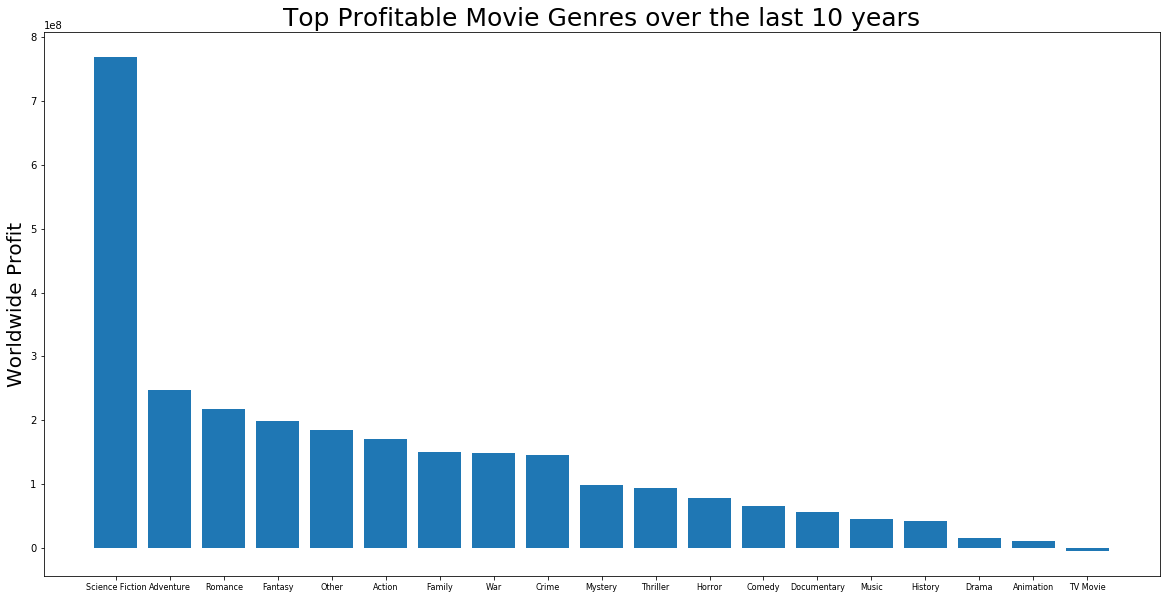

In [35]:
#creating bar graph from pandas columns
m = genreprofitsortdfW['genre']
n = genreprofitsortdfW['profit_average']
plt.figure(figsize=(20,10))
plt.bar(m, n)
plt.xticks(m, fontsize =(8))
plt.ylabel('Worldwide Profit', fontsize =(20))
plt.title('Top Profitable Movie Genres over the last 10 years', fontsize = (25))
plt.savefig('Top Profitable Movie Genres over the last 10 years.png', dpi=600, bbox_inches='tight')

In [36]:
#same method as creating a column for profit, but now with budget
unique_genres = list(genre_dict_copy.keys())

genre_budget_dict = {}
for index, row in tn_df_recent10.iterrows():
    for genre in unique_genres:
        if genre in row['genre']:
            budget = row['production_budget']
            if genre in genre_budget_dict:
                genre_budget_dict[genre] += budget
            else:
                genre_budget_dict[genre] = budget
                
genreprofit_df['budget_average'] = list(genre_budget_dict.values())/genreprofit_df['count']
genreprofit_df

,genre,count,profit_average,budget_average
0,Action,457,1.704054e+08,8.111035e+07
1,Adventure,332,2.473225e+08,1.072892e+08
2,Fantasy,189,1.991115e+08,9.484905e+07
3,Science Fiction,218,7.694423e+08,3.514562e+08
4,Thriller,451,9.395402e+07,4.198456e+07
5,Crime,228,1.453891e+08,7.036147e+07
6,Drama,820,1.545816e+07,9.434326e+06
7,Western,25,1.517305e+09,8.193091e+08
8,Animation,120,1.023637e+07,1.121417e+07
9,Family,195,1.506130e+08,5.449103e+07


In [37]:
#once again, western looks abnormally high, so it will be cut out.
#science fiction also somewhat iffy
genrebudgetsortdf = genreprofit_df.sort_values(by=['profit_average'], ascending=False)
genrebudgetsortdfW = genrebudgetsortdf.iloc[1:]
top5budget = genrebudgetsortdfW.head(5)
top5budget

,genre,count,profit_average,budget_average
3,Science Fiction,218,7.694423e+08,3.514562e+08
1,Adventure,332,2.473225e+08,1.072892e+08
11,Romance,241,2.170573e+08,9.361097e+07
2,Fantasy,189,1.991115e+08,9.484905e+07
18,Other,3,1.841859e+08,1.014633e+08


# How much can we expect to spend?

Now that we know what genres are safe to invest in, how much can we expect to spend? We're going to need to add another column to our genre dataframe with the average budget per genre.

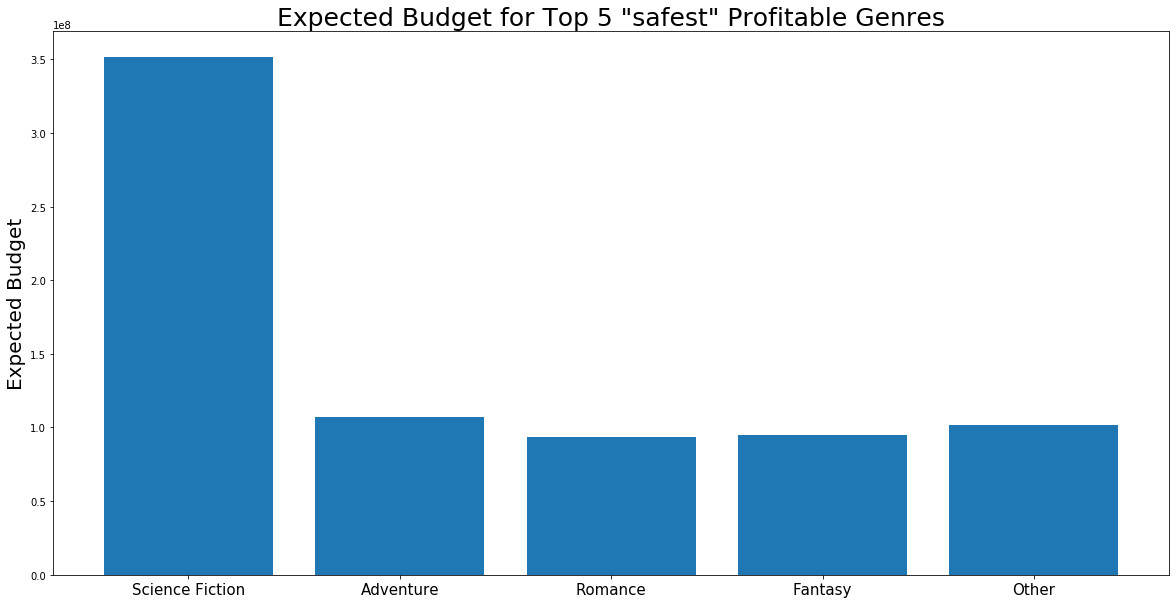

In [38]:
#creating a visualization
m = top5budget['genre']
n = top5budget['budget_average']
plt.figure(figsize=(20,10))
plt.bar(m, n)
plt.xticks(m, fontsize =(15))
plt.ylabel('Expected Budget', fontsize =(20))
plt.title('Expected Budget for Top 5 "safest" Profitable Genres', fontsize = (25))
plt.savefig('Expected Budget for Top 5 "safest" Profitable Genres', dpi=600, bbox_inches='tight')